#### Learning Objectives:
- Write and apply one-line **lambda functions**
- Identify and fill **missing values** in a dataframe
- Familiarize yourself with **Pandas' time series** functionality


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def square_root(x): 
    return x** .5

square_root_lambda = lambda x: x ** .5

In [4]:
def square(x):
    return x ** 2

square_lambda = lambda x: x ** 2

In [11]:
square_lambda(21)

441

### Lambda

Lambda is a tool for building functions. We already know how to build functions
using def, but let's do a quick comparison of the two.

Here's building a function using def:
```Python
def square_root(x): return x ** .5
```

Here's building the same function using lambda
```Python
square_root_lambda = lambda x: x ** .5
```

In [5]:
square_root(2)

1.4142135623730951

In [6]:
square_root_lambda(2)

1.4142135623730951

### Quck check
Write a normal function to calculate the area of a square (remember to write a docstring!)

Then, re-write that funciton as a lambda function.

In [27]:
#Function here
def square(x):
    
#Lambda function here:


### Lambdas are 'anonymous functions'
Lambda functions are useful when you have an operation that your code only calls once.

Some things to remember about lambda:
- it does not contain a return statement
- it is not a named function
- it is a tool for creating anonymous procedures
- it only takes a single expression (so, no loops or if statements)

For example in this code:
```Python
def _range(x):
    return np.max(x) - np.min(x)
    
df.pivot_table(index='A', aggfunc = (np.mean, _range))
```


You can replace the `_range` function with a lambda:

```Python
df.pivot_table(index='A', aggfunc = (np.mean, lambda x: np.max(x) - np.min(x)))
```

In [12]:
df = pd.DataFrame(np.random.randint(0,100,size=(7, 4)), \
                  columns=list('ABCD'))
df.head()

,A,B,C,D
0,72,43,57,66
1,91,97,0,72
2,27,42,82,51
3,50,27,48,20
4,33,79,18,15


In [13]:
df.A = df.A.apply(lambda x: x*2)
df.head()

,A,B,C,D
0,144,43,57,66
1,182,97,0,72
2,54,42,82,51
3,100,27,48,20
4,66,79,18,15


### Take a minute
Practice writing a few lambda functions and applying them to this dataframe

More information on [Lambda](https://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/).


In [19]:
df.B = df.B.apply(lambda y: y**0.33)
df.C = df.C.apply(lambda z: "Number "+str(z))
df.head()

,A,B,C,D
0,144,1.506207,Number 57,66
1,182,1.645733,Number 0,72
2,54,1.502353,Number 82,51
3,100,1.431777,Number 48,20
4,66,1.609354,Number 18,15


### Missing data

Missing data is also known as NA values.  By “missing” we simply mean null or
“not present for whatever reason”. Many data sets simply arrive with missing data,
either because it exists and was not collected or it never existed.

Missing data may appear as many forms -- the 'NA' string, np.nan, or the Python None type.

Use the isnull() method to detect the missing values. The output shows True when
the value is missing. 


In [20]:
s = pd.Series([1, 2, 3, np.NaN, 5, 6, None])
print s.isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
dtype: bool


By adding an index into the dataset, you obtain just the
entries that are missing.

In [21]:
s = pd.Series([1, 2, 3, np.NaN, 5, 6, None])

print s[s.isnull()]

3   NaN
6   NaN
dtype: float64


### Fill in missing data

To fill in missing data use fillna(). For fillna() you need to provide
a number. Usually, the mean, median, or mode is used. Let's use the same data
set and this time let's fill in missing values with the mean.

We could also just drop all the NAs, by using dropna()

In [22]:
s = pd.Series([1, 2, 3, np.NaN, 5, 6, None])

m = int(s.mean())

print s.fillna(m)

print s.dropna()

0    1.0
1    2.0
2    3.0
3    3.0
4    5.0
5    6.0
6    3.0
dtype: float64
0    1.0
1    2.0
2    3.0
4    5.0
5    6.0
dtype: float64


### We can do the same thing with a dataframe

In [24]:
df['S'] = s
df

,A,B,C,D,S
0,144,1.506207,Number 57,66,1.0
1,182,1.645733,Number 0,72,2.0
2,54,1.502353,Number 82,51,3.0
3,100,1.431777,Number 48,20,NaN
4,66,1.609354,Number 18,15,5.0
5,36,1.502353,Number 75,10,6.0
6,26,1.477343,Number 14,69,NaN


In [25]:
df.fillna(df.mean())

,A,B,C,D,S
0,144,1.506207,Number 57,66,1.0
1,182,1.645733,Number 0,72,2.0
2,54,1.502353,Number 82,51,3.0
3,100,1.431777,Number 48,20,3.4
4,66,1.609354,Number 18,15,5.0
5,36,1.502353,Number 75,10,6.0
6,26,1.477343,Number 14,69,3.4


### df.dropna() drops every row with a missing value

In [26]:
df

,A,B,C,D,S
0,144,1.506207,Number 57,66,1.0
1,182,1.645733,Number 0,72,2.0
2,54,1.502353,Number 82,51,3.0
3,100,1.431777,Number 48,20,NaN
4,66,1.609354,Number 18,15,5.0
5,36,1.502353,Number 75,10,6.0
6,26,1.477343,Number 14,69,NaN


In [27]:
df.dropna()

,A,B,C,D,S
0,144,1.506207,Number 57,66,1.0
1,182,1.645733,Number 0,72,2.0
2,54,1.502353,Number 82,51,3.0
4,66,1.609354,Number 18,15,5.0
5,36,1.502353,Number 75,10,6.0


![](https://thetomatos.com/wp-content/uploads/2016/05/caution-clipart-8.png)

### Careful when you start removing or replacing missing data
- Once you start altering your dataset to make it more 'workable' you corrupt the informaton inside
- Keep track of every assumption you make and be ready to defend it
- Your analysis should be reproducable and as close to the actual data as possible

More on [working with missing data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

### Take a minute
Jot down some thoughts here:
- When might you want to .dropna() on an entire table?
- When might you want to .fillna() with the mean or the median of a column?

And practice filling in parts of a missing dataframe with the mean or median. 

In a few weeks, we'll look at some more advanced ways to fill in missing data. This includes imputing the value with K nearest neighbors, or replacing data with the value for rows that are most similar. 

### Time Series in Pandas

Pandas was designed to handle financial data. So, as you might expect, it handles dates and times really well.

Let's practice with a few capabilities: 
- pd.to_datetime()
- pd.date_range()
- pd.Period()

### pd.to_datetime()
Converts a variety of inputs into a Timestamp

In [28]:
pd.to_datetime('2016-06-16')

Timestamp('2016-06-16 00:00:00')

In [29]:
pd.to_datetime('1/2/2013')

Timestamp('2013-01-02 00:00:00')

In [30]:
pd.to_datetime('November 6th 1992, 4:00PM')

Timestamp('1992-11-06 16:00:00')

### Under the hood
Pandas stores Timestamps as integer (the number of nanosecods since 1970).

In [31]:
pd.to_datetime(1)

Timestamp('1970-01-01 00:00:00.000000001')

Since pandas represents timestamps in nanosecond resolution, the timespan that can be represented using a 64-bit integer is limited to approximately 584 years.

In [32]:
pd.Timestamp.min

Timestamp('1677-09-22 00:12:43.145225')

In [35]:
x = pd.Timestamp.max
x

Timestamp('2262-04-11 23:47:16.854775807')

### pd.date_range()
Takes an input of a starting date, number of period, and frequency:

In [36]:
y = pd.date_range('2000-1-1', periods=7, freq='M')
y

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31'],
              dtype='datetime64[ns]', freq='M')

In [37]:
df.set_index(y, inplace=True)
df

,A,B,C,D,S
2000-01-31,144,1.506207,Number 57,66,1.0
2000-02-29,182,1.645733,Number 0,72,2.0
2000-03-31,54,1.502353,Number 82,51,3.0
2000-04-30,100,1.431777,Number 48,20,NaN
2000-05-31,66,1.609354,Number 18,15,5.0
2000-06-30,36,1.502353,Number 75,10,6.0
2000-07-31,26,1.477343,Number 14,69,NaN


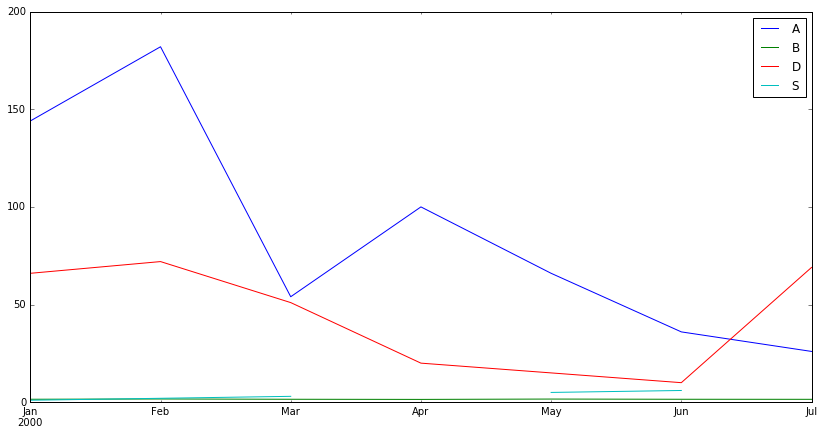

In [38]:
df.plot(figsize=(14,7))

### pd.Period()
In some cases it makes more sense to represent time with a period instead of a timestamp:

In [39]:
pd.Period('2011-4', freq='Q')

Period('2011Q2', 'Q-DEC')

In [40]:
pd.period_range('1/1/2011', '1/1/2012', freq='M')

PeriodIndex(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
             '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
             '2012-01'],
            dtype='int64', freq='M')

More on [date/time in pandas](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)